<a href="https://colab.research.google.com/github/shahd1995913/-THINK-Surgical/blob/main/DEPTH_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


MiDaS model loaded successfully ✅


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (1).png


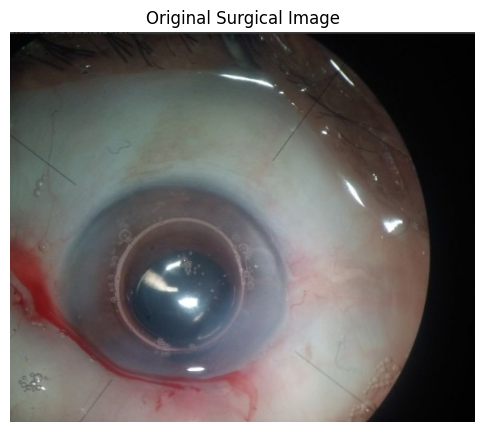

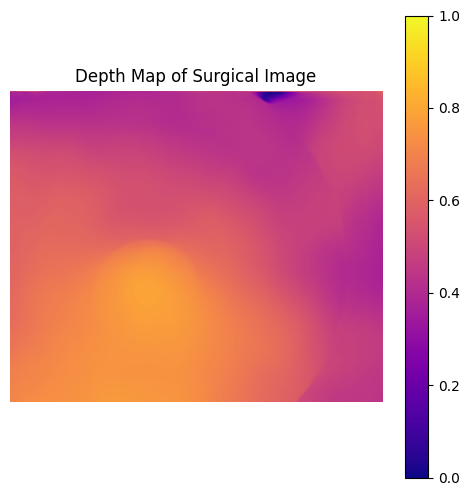

Depth estimation completed successfully ✅


In [4]:
# ---------------------------------------------
# Depth Estimation on Surgical Images using MiDaS via Torch Hub
# Google Colab Ready ✅
# ---------------------------------------------

# 1️⃣ Install required libraries
# !pip install torch torchvision opencv-python matplotlib timm --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

# Set device (GPU if available, else CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS model via Torch Hub
model_type = "DPT_Large"  # Options: DPT_Large, DPT_Hybrid, MiDaS_small
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device)
midas.eval()

# Load the corresponding image transforms for the model
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type.startswith("DPT") else midas_transforms.small_transform

print("MiDaS model loaded successfully ✅")

# ---------------------------------------------
# 4️⃣ Upload the surgical image
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload an image
image_path = list(uploaded.keys())[0]

# Read the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB for display

# Display the original surgical image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Surgical Image")
plt.axis('off')
plt.show()

# ---------------------------------------------
# 5️⃣ Prepare the image for the model
input_batch = transform(img_rgb).to(device)

# Ensure batch dimension exists
if len(input_batch.shape) == 3:
    input_batch = input_batch.unsqueeze(0)

# ---------------------------------------------
# 6️⃣ Run the model to get the depth map
with torch.no_grad():
    prediction = midas(input_batch)
    # Resize the output to match original image size
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img_rgb.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze().cpu().numpy()

# Normalize depth map for visualization
depth_min = prediction.min()
depth_max = prediction.max()
prediction_normalized = (prediction - depth_min) / (depth_max - depth_min)

# ---------------------------------------------
# 7️⃣ Display the depth map
plt.figure(figsize=(6,6))
plt.imshow(prediction_normalized, cmap='plasma')
plt.title("Depth Map of Surgical Image")
plt.axis('off')
plt.colorbar()
plt.show()

print("Depth estimation completed successfully ✅")


In [5]:
cv2.imwrite("depth_map1.png", (prediction_normalized*255).astype(np.uint8))

True

Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Upload 5 surgical images


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (2).png


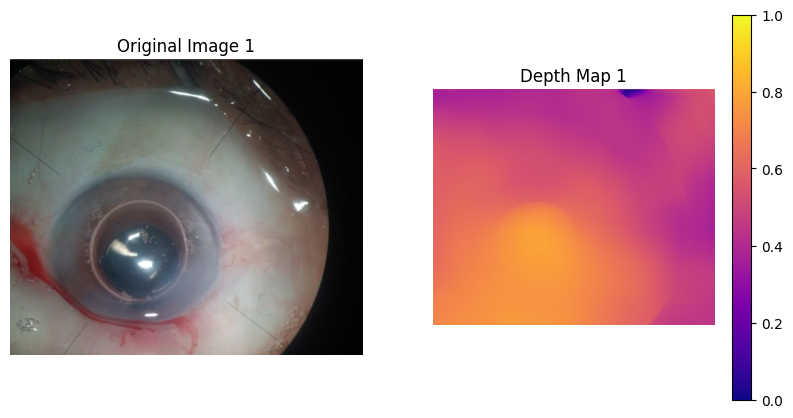

In [6]:
# ---------------------------------------------
# 1️⃣ Install libraries
!pip install torch torchvision opencv-python matplotlib timm --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS model
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type.startswith("DPT") else midas_transforms.small_transform

# ---------------------------------------------
# 4️⃣ Upload multiple images
print("Upload 5 surgical images")
uploaded = files.upload()
image_paths = list(uploaded.keys())

# ---------------------------------------------
# 5️⃣ Process each image
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    input_batch = transform(img_rgb).to(device)
    if len(input_batch.shape) == 3:
        input_batch = input_batch.unsqueeze(0)

    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img_rgb.shape[:2],
            mode="bicubic",
            align_corners=False
        ).squeeze().cpu().numpy()

    depth_min = prediction.min()
    depth_max = prediction.max()
    depth_normalized = (prediction - depth_min) / (depth_max - depth_min)

    # Show original + depth map side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(depth_normalized, cmap='plasma')
    plt.title(f"Depth Map {i+1}")
    plt.axis('off')
    plt.colorbar()

    plt.show()

    # Optional: save depth map
    cv2.imwrite(f"depth_map_{i+1}.png", (depth_normalized*255).astype(np.uint8))

In [7]:
!pip install open3d --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 854.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s eta 0:00:00


In [8]:
import open3d as o3d

def depth_to_point_cloud(depth_map, scale=1.0):
    """
    Convert a normalized depth map (0-1) to 3D point cloud.
    scale: arbitrary scale to exaggerate depth for visualization
    """
    h, w = depth_map.shape
    fx = fy = 1.0  # focal lengths (normalized)
    cx = w / 2
    cy = h / 2

    points = []
    for v in range(h):
        for u in range(w):
            z = depth_map[v, u] * scale
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            points.append([x, y, z])
    return np.array(points)

In [18]:
import os
os.listdir()
cv2.imwrite(f"depth_map_{i+1}.png", (depth_normalized*255).astype(np.uint8))
import cv2
import numpy as np

depth_map_path = f"depth_map_{i+1}.png"
depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)

if depth_map is None:
    raise FileNotFoundError(f"{depth_map_path} not found. Make sure the depth map was saved correctly!")

depth_map = depth_map.astype(np.float32) / 255.0


In [19]:
import cv2
import numpy as np

depth_map_path = f"depth_map_{i+1}.png"
depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)

if depth_map is None:
    raise FileNotFoundError(f"{depth_map_path} not found!")

depth_map = depth_map.astype(np.float32) / 255.0


Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Upload 5 surgical images (or sample images)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (3).png
Uploaded images: ['Screenshot 2025-11-19 195003 (3).png']


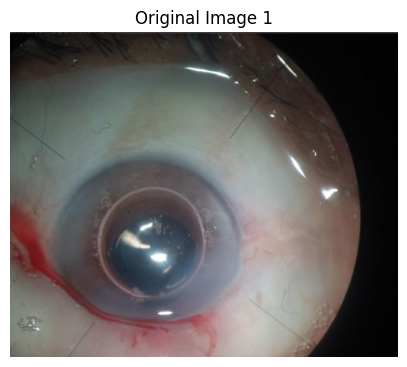

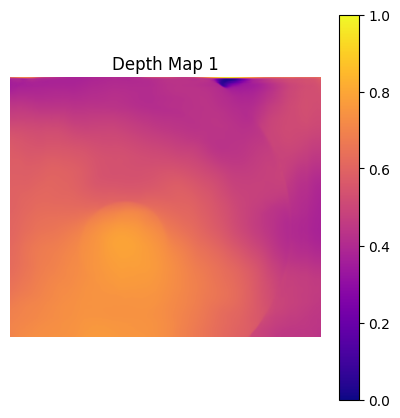

Saved depth_map_1.png
Total 3D points: (277150, 3)
Visualizing 3D point cloud...
[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [20]:
# ---------------------------------------------
# 1️⃣ Install required libraries
# !pip install torch torchvision opencv-python matplotlib timm open3d --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import open3d as o3d
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS model
model_type = "DPT_Large"  # High-quality depth estimation
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type.startswith("DPT") else midas_transforms.small_transform

# ---------------------------------------------
# 4️⃣ Upload multiple images
print("Upload 5 surgical images (or sample images)")
uploaded = files.upload()
image_paths = list(uploaded.keys())
print("Uploaded images:", image_paths)

# ---------------------------------------------
# 5️⃣ Function to convert depth map to 3D points
def depth_to_point_cloud(depth_map, scale=1.0):
    h, w = depth_map.shape
    fx = fy = 1.0  # simple normalized focal lengths
    cx = w / 2
    cy = h / 2
    points = []
    for v in range(h):
        for u in range(w):
            z = depth_map[v, u] * scale
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            points.append([x, y, z])
    return np.array(points)

# ---------------------------------------------
# 6️⃣ Process each image: generate and save depth maps
all_points = []

for i, path in enumerate(image_paths):
    # Read image
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display original image
    plt.figure(figsize=(5,5))
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
    plt.show()

    # Prepare input
    input_batch = transform(img_rgb).to(device)
    if len(input_batch.shape) == 3:
        input_batch = input_batch.unsqueeze(0)

    # Predict depth map
    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img_rgb.shape[:2],
            mode="bicubic",
            align_corners=False
        ).squeeze().cpu().numpy()

    # Normalize for visualization
    depth_min = prediction.min()
    depth_max = prediction.max()
    depth_normalized = (prediction - depth_min) / (depth_max - depth_min)

    # Show depth map
    plt.figure(figsize=(5,5))
    plt.imshow(depth_normalized, cmap='plasma')
    plt.title(f"Depth Map {i+1}")
    plt.axis('off')
    plt.colorbar()
    plt.show()

    # Save depth map
    depth_file = f"depth_map_{i+1}.png"
    cv2.imwrite(depth_file, (depth_normalized*255).astype(np.uint8))
    print(f"Saved {depth_file}")

    # Convert to 3D points
    points = depth_to_point_cloud(depth_normalized, scale=2.0)
    all_points.append(points)

# ---------------------------------------------
# 7️⃣ Combine all points into one point cloud
all_points = np.vstack(all_points)
print("Total 3D points:", all_points.shape)

# ---------------------------------------------
# 8️⃣ Create Open3D point cloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(all_points)

# Color points by Z (depth)
colors = np.zeros_like(all_points)
colors[:,2] = all_points[:,2] / np.max(all_points[:,2])  # normalize depth
pcd.colors = o3d.utility.Vector3dVector(colors)

print("Visualizing 3D point cloud...")
o3d.visualization.draw_geometries([pcd])


Point cloud saved as surgical_point_cloud.ply


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

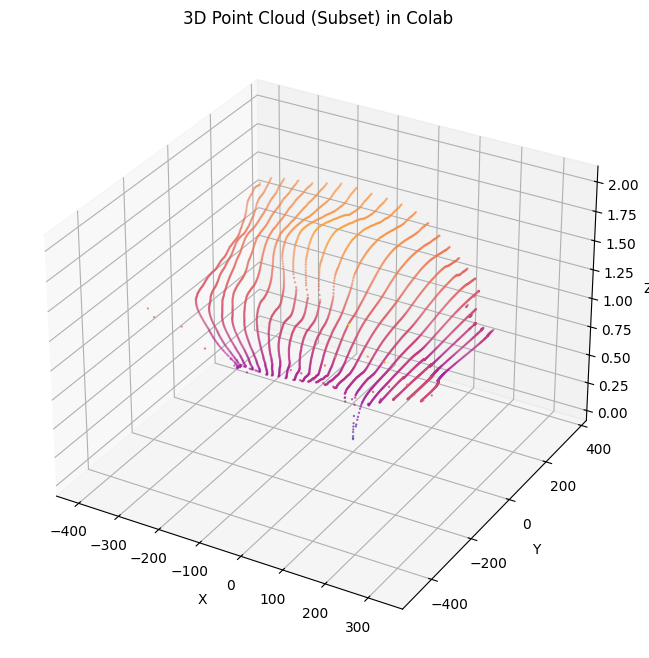

In [21]:
# Color points by Z (depth)
colors = np.zeros_like(all_points)
colors[:,2] = all_points[:,2] / np.max(all_points[:,2])  # normalize depth
pcd.colors = o3d.utility.Vector3dVector(colors)

# ---------------------------------------------
# 9️⃣ Save point cloud as PLY for download
ply_file = "surgical_point_cloud.ply"
o3d.io.write_point_cloud(ply_file, pcd)
print(f"Point cloud saved as {ply_file}")

files.download(ply_file)

# ---------------------------------------------
# 🔹 10️⃣ Visualize point cloud in Colab using Matplotlib (subset for speed)
from mpl_toolkits.mplot3d import Axes3D

sample_points = all_points[::50]  # sample every 50th point for plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_points[:,0], sample_points[:,1], sample_points[:,2], c=sample_points[:,2], cmap='plasma', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Point Cloud (Subset) in Colab")
plt.show()

In [23]:
# Estimate normals
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30))

# Create mesh using Poisson reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)
o3d.io.write_triangle_mesh("surgical_mesh.ply", mesh)

True

Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Upload 1 surgical image (or sample)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (4).png


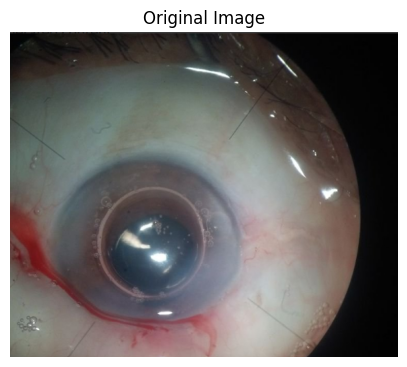

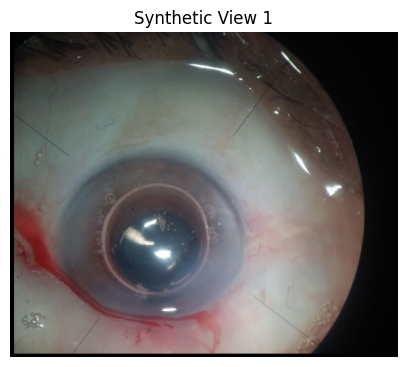

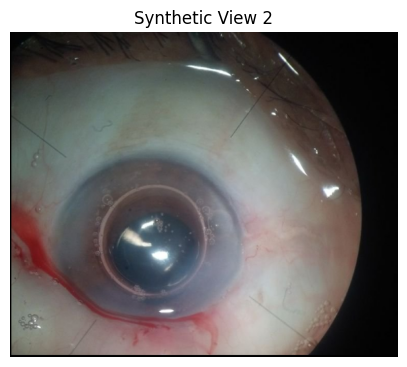

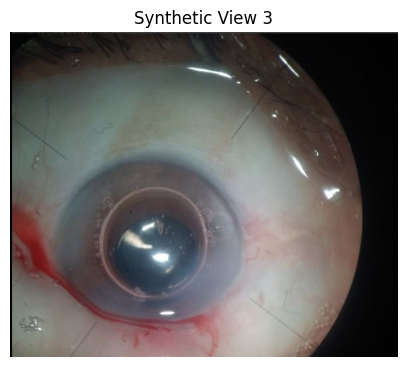

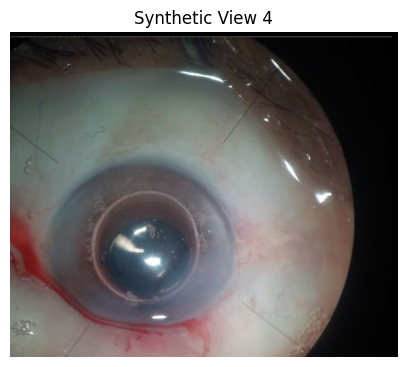

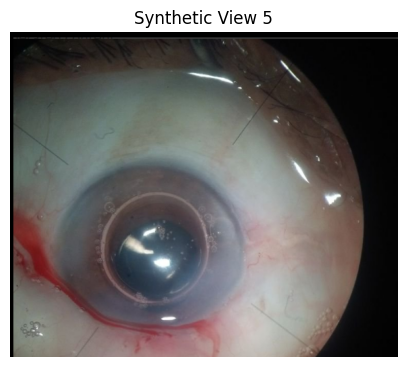

Total points after fusion: (1385750, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Point cloud saved as synthetic_3D_point_cloud.ply


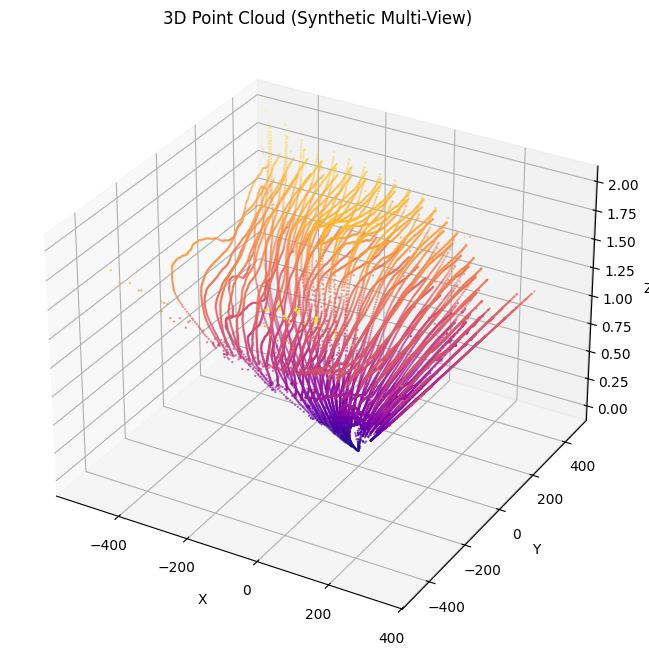

In [24]:
# ---------------------------------------------
# 1️⃣ Install required libraries
# !pip install torch torchvision opencv-python matplotlib timm open3d --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import open3d as o3d

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS model
model_type = "DPT_Large"  # High-quality depth estimation
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type.startswith("DPT") else midas_transforms.small_transform

# ---------------------------------------------
# 4️⃣ Upload 1 surgical image (we will simulate multiple views)
print("Upload 1 surgical image (or sample)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# ---------------------------------------------
# 5️⃣ Function to convert depth map to 3D points
def depth_to_point_cloud(depth_map, scale=1.0):
    h, w = depth_map.shape
    fx = fy = 1.0
    cx = w / 2
    cy = h / 2
    points = []
    for v in range(h):
        for u in range(w):
            z = depth_map[v, u] * scale
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            points.append([x, y, z])
    return np.array(points)

# ---------------------------------------------
# 6️⃣ Simulate multiple viewpoints by shifting/rotating image
def create_synthetic_views(img_rgb, n_views=5, max_shift=10):
    h, w, _ = img_rgb.shape
    views = []
    for i in range(n_views):
        M = np.float32([[1, 0, np.random.randint(-max_shift, max_shift)],
                        [0, 1, np.random.randint(-max_shift, max_shift)]])
        shifted = cv2.warpAffine(img_rgb, M, (w, h))
        views.append(shifted)
    return views

synthetic_views = create_synthetic_views(img_rgb, n_views=5)

# ---------------------------------------------
# 7️⃣ Generate depth maps for each synthetic view
all_points = []

for i, view in enumerate(synthetic_views):
    plt.figure(figsize=(5,5))
    plt.imshow(view)
    plt.title(f"Synthetic View {i+1}")
    plt.axis('off')
    plt.show()

    input_batch = transform(view).to(device)
    if len(input_batch.shape) == 3:
        input_batch = input_batch.unsqueeze(0)

    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=view.shape[:2],
            mode="bicubic",
            align_corners=False
        ).squeeze().cpu().numpy()

    # Normalize
    depth_min = prediction.min()
    depth_max = prediction.max()
    depth_normalized = (prediction - depth_min) / (depth_max - depth_min)

    # Convert to 3D points
    points = depth_to_point_cloud(depth_normalized, scale=2.0)
    all_points.append(points)

# ---------------------------------------------
# 8️⃣ Merge all points into one dense point cloud
all_points = np.vstack(all_points)
print("Total points after fusion:", all_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(all_points)
colors = np.zeros_like(all_points)
colors[:,2] = all_points[:,2] / np.max(all_points[:,2])
pcd.colors = o3d.utility.Vector3dVector(colors)

# ---------------------------------------------
# 9️⃣ Save as PLY
ply_file = "synthetic_3D_point_cloud.ply"
o3d.io.write_point_cloud(ply_file, pcd)
files.download(ply_file)
print(f"Point cloud saved as {ply_file}")

# ---------------------------------------------
# 🔹 10️⃣ Visualize subset in Colab using Matplotlib
from mpl_toolkits.mplot3d import Axes3D

sample_points = all_points[::50]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_points[:,0], sample_points[:,1], sample_points[:,2],
           c=sample_points[:,2], cmap='plasma', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Point Cloud (Synthetic Multi-View)")
plt.show()

# ----------------------


In [25]:
# Take every 10th point to reduce size
sampled_points = all_points[::10]

pcd_sampled = o3d.geometry.PointCloud()
pcd_sampled.points = o3d.utility.Vector3dVector(sampled_points)
colors = np.zeros_like(sampled_points)
colors[:,2] = sampled_points[:,2] / np.max(sampled_points[:,2])
pcd_sampled.colors = o3d.utility.Vector3dVector(colors)

# Save smaller PLY
ply_file = "synthetic_3D_point_cloud_sampled.ply"
o3d.io.write_point_cloud(ply_file, pcd_sampled)
from google.colab import files
files.download(ply_file)
print(f"Reduced point cloud saved as {ply_file}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reduced point cloud saved as synthetic_3D_point_cloud_sampled.ply


[link text](https://3dviewer.net/#)

Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (5).png


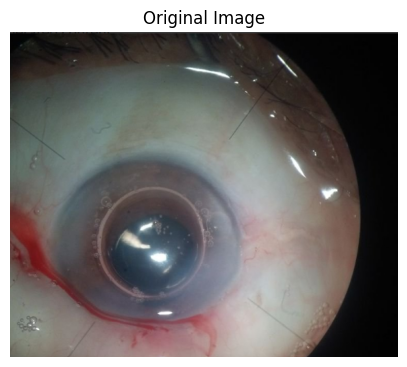

Total points before sampling: (1385750, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sampled point cloud saved as synthetic_3D_point_cloud_sampled.ply


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lightweight mesh saved as synthetic_3D_mesh_sampled.ply


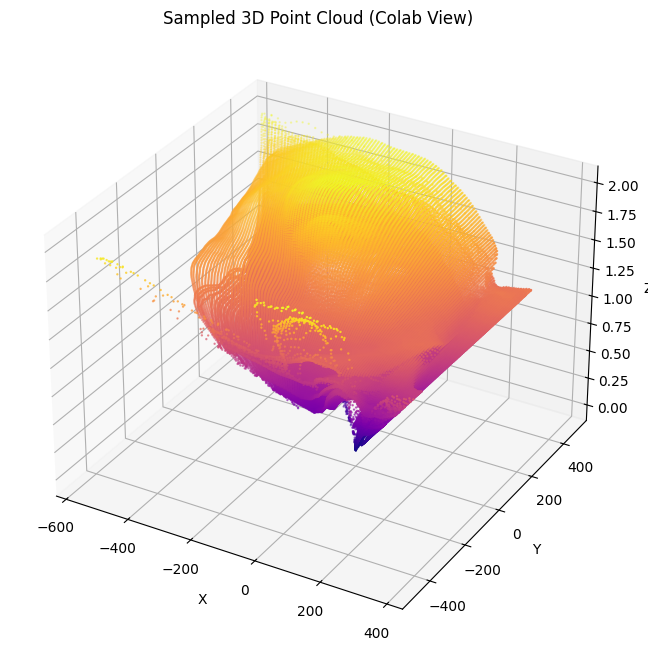

In [26]:
# ---------------------------------------------
# 1️⃣ Install required libraries
# !pip install torch torchvision opencv-python matplotlib timm open3d --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import open3d as o3d

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS model
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type.startswith("DPT") else midas_transforms.small_transform

# ---------------------------------------------
# 4️⃣ Upload 1 surgical image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# ---------------------------------------------
# 5️⃣ Convert depth map to 3D points
def depth_to_point_cloud(depth_map, scale=1.0):
    h, w = depth_map.shape
    fx = fy = 1.0
    cx = w / 2
    cy = h / 2
    points = []
    for v in range(h):
        for u in range(w):
            z = depth_map[v, u] * scale
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            points.append([x, y, z])
    return np.array(points)

# ---------------------------------------------
# 6️⃣ Simulate multiple synthetic views
def create_synthetic_views(img_rgb, n_views=5, max_shift=10):
    h, w, _ = img_rgb.shape
    views = []
    for i in range(n_views):
        M = np.float32([[1, 0, np.random.randint(-max_shift, max_shift)],
                        [0, 1, np.random.randint(-max_shift, max_shift)]])
        shifted = cv2.warpAffine(img_rgb, M, (w, h))
        views.append(shifted)
    return views

synthetic_views = create_synthetic_views(img_rgb, n_views=5)

# ---------------------------------------------
# 7️⃣ Generate depth maps and merge points
all_points = []
for i, view in enumerate(synthetic_views):
    input_batch = transform(view).to(device)
    if len(input_batch.shape) == 3:
        input_batch = input_batch.unsqueeze(0)

    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=view.shape[:2],
            mode="bicubic",
            align_corners=False
        ).squeeze().cpu().numpy()

    depth_min = prediction.min()
    depth_max = prediction.max()
    depth_normalized = (prediction - depth_min) / (depth_max - depth_min)

    points = depth_to_point_cloud(depth_normalized, scale=2.0)
    all_points.append(points)

all_points = np.vstack(all_points)
print("Total points before sampling:", all_points.shape)

# ---------------------------------------------
# 8️⃣ Sample point cloud for lightweight PLY
sampled_points = all_points[::10]  # take every 10th point
pcd_sampled = o3d.geometry.PointCloud()
pcd_sampled.points = o3d.utility.Vector3dVector(sampled_points)
colors = np.zeros_like(sampled_points)
colors[:,2] = sampled_points[:,2] / np.max(sampled_points[:,2])
pcd_sampled.colors = o3d.utility.Vector3dVector(colors)

# Save sampled point cloud
ply_file = "synthetic_3D_point_cloud_sampled.ply"
o3d.io.write_point_cloud(ply_file, pcd_sampled)
files.download(ply_file)
print(f"Sampled point cloud saved as {ply_file}")

# ---------------------------------------------
# 9️⃣ Generate lightweight mesh
pcd_sampled.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30))
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd_sampled, depth=8)
mesh_file = "synthetic_3D_mesh_sampled.ply"
o3d.io.write_triangle_mesh(mesh_file, mesh)
files.download(mesh_file)
print(f"Lightweight mesh saved as {mesh_file}")

# ---------------------------------------------
# 🔹 10️⃣ Visualize subset in Colab with Matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_points[:,0], sampled_points[:,1], sampled_points[:,2],
           c=sampled_points[:,2], cmap='plasma', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Sampled 3D Point Cloud (Colab View)")
plt.show()


In [27]:
# Downsample points for speed
pcd_down = pcd_sampled.voxel_down_sample(voxel_size=1.0)

# Estimate normals
pcd_down.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=20))

# Ball-pivoting mesh
radii = [1.0, 2.0, 4.0]
mesh_bpa = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd_down, o3d.utility.DoubleVector(radii)
)
o3d.io.write_triangle_mesh("mesh_bpa.ply", mesh_bpa)
files.download("mesh_bpa.ply")
print("Ball-Pivoting mesh saved")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ball-Pivoting mesh saved


Running on device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (6).png


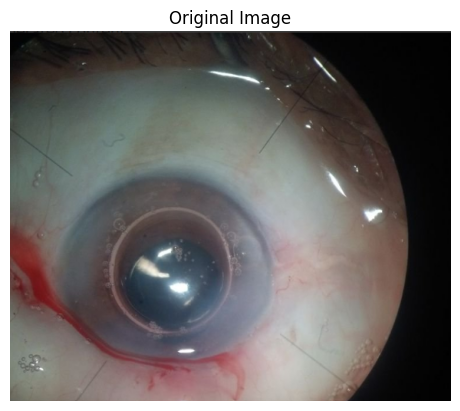

Total points: (1385750, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Point cloud saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ball-Pivoting mesh saved


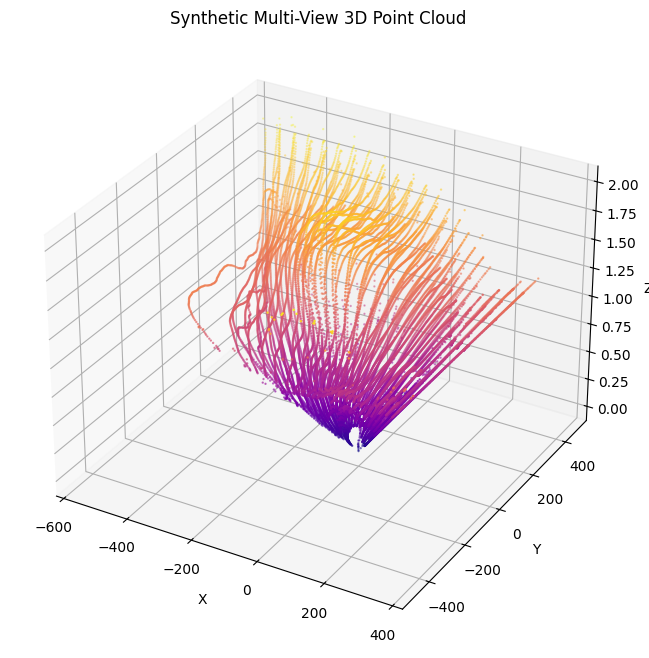

In [28]:
# ---------------------------------------------
# 1️⃣ Install libraries
# !pip install torch torchvision opencv-python matplotlib timm open3d --quiet

# ---------------------------------------------
# 2️⃣ Import libraries
import torch, cv2, numpy as np, matplotlib.pyplot as plt
from google.colab import files
import open3d as o3d

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Running on device: {device}")

# ---------------------------------------------
# 3️⃣ Load MiDaS DPT_Large
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
midas.to(device).eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

# ---------------------------------------------
# 4️⃣ Upload surgical image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.title("Original Image"); plt.axis('off'); plt.show()

# ---------------------------------------------
# 5️⃣ Depth to 3D point cloud
def depth_to_point_cloud(depth_map, scale=1.0):
    h, w = depth_map.shape
    cx, cy, fx, fy = w/2, h/2, 1.0, 1.0
    points = []
    for v in range(h):
        for u in range(w):
            z = depth_map[v,u]*scale
            x = (u-cx)*z/fx
            y = (v-cy)*z/fy
            points.append([x,y,z])
    return np.array(points)

# ---------------------------------------------
# 6️⃣ Simulate multiple views
def synthetic_views(img_rgb, n_views=5, max_shift=10):
    h,w,_ = img_rgb.shape
    views = []
    for i in range(n_views):
        M = np.float32([[1,0,np.random.randint(-max_shift,max_shift)],
                        [0,1,np.random.randint(-max_shift,max_shift)]])
        shifted = cv2.warpAffine(img_rgb,M,(w,h))
        views.append(shifted)
    return views

views = synthetic_views(img_rgb)

# ---------------------------------------------
# 7️⃣ Generate depth maps and merge points
all_points = []
for view in views:
    batch = transform(view).to(device)
    if batch.ndim==3: batch = batch.unsqueeze(0)
    with torch.no_grad():
        pred = midas(batch)
        pred = torch.nn.functional.interpolate(pred.unsqueeze(1),
                                               size=view.shape[:2],
                                               mode="bicubic",
                                               align_corners=False).squeeze().cpu().numpy()
    pred_norm = (pred - pred.min()) / (pred.max()-pred.min())
    all_points.append(depth_to_point_cloud(pred_norm, scale=2.0))

all_points = np.vstack(all_points)
print("Total points:", all_points.shape)

# ---------------------------------------------
# 8️⃣ Sample point cloud for lightweight PLY
sampled_points = all_points[::10]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(sampled_points)
colors = np.zeros_like(sampled_points)
colors[:,2] = sampled_points[:,2]/sampled_points[:,2].max()
pcd.colors = o3d.utility.Vector3dVector(colors)

ply_file = "synthetic_point_cloud_sampled.ply"
o3d.io.write_point_cloud(ply_file, pcd)
files.download(ply_file)
print("Point cloud saved")

# ---------------------------------------------
# 9️⃣ Generate mesh using Ball-Pivoting (works better for scattered points)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=20))
radii = [1.0,2.0,4.0]
mesh_bpa = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii)
)
mesh_file = "synthetic_mesh_bpa.ply"
o3d.io.write_triangle_mesh(mesh_file, mesh_bpa)
files.download(mesh_file)
print("Ball-Pivoting mesh saved")

# ---------------------------------------------
# 10️⃣ Visualize subset in Colab
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(sampled_points[::5,0], sampled_points[::5,1], sampled_points[::5,2],
           c=sampled_points[::5,2], cmap='plasma', s=0.5)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.title("Synthetic Multi-View 3D Point Cloud")
plt.show()


In [29]:
# Robust mesh attempt: clean point cloud, Poisson -> fallback to Ball-Pivoting
# !pip install open3d --quiet

import open3d as o3d
import numpy as np
from google.colab import files
import os
import math

# If you already have pcd_sampled in memory (Open3D PointCloud), skip file load.
# Otherwise, change this path to your sampled PLY filename.
ply_in = "synthetic_3D_point_cloud_sampled.ply"
if not os.path.exists(ply_in):
    raise FileNotFoundError(f"{ply_in} not found in Colab working dir. Please upload or set correct filename.")

print("Loading sampled point cloud:", ply_in)
pcd = o3d.io.read_point_cloud(ply_in)
print("Original points:", np.asarray(pcd.points).shape[0])

# 1) Voxel down-sample to regularize spacing (adjust voxel_size to tune)
voxel_size = 0.005  # try 0.002..0.02 depending on scene scale; reduce for more detail
pcd = pcd.voxel_down_sample(voxel_size=voxel_size)
print("After voxel downsample:", np.asarray(pcd.points).shape[0])

# 2) Remove statistical outliers
pcd, ind = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
print("After outlier removal:", np.asarray(pcd.points).shape[0])

# 3) Estimate normals (use hybrid search for robustness)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=voxel_size*5, max_nn=30))

# 4) Orient normals consistently toward point cloud center (important for Poisson)
center = pcd.get_center()
pcd.orient_normals_towards_camera_location(camera_location=center)

# quick sanity: check normals exist
if len(np.asarray(pcd.normals)) == 0:
    raise RuntimeError("Normal estimation failed.")

# Save cleaned point cloud for inspection
cleaned_ply = "pcd_cleaned.ply"
o3d.io.write_point_cloud(cleaned_ply, pcd)
print("Saved cleaned point cloud:", cleaned_ply)

# 5) Attempt Poisson reconstruction (tune depth if needed)
print("Attempting Poisson reconstruction...")
try:
    mesh_poisson, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
    # Remove low-density vertices (optional)
    densities = np.asarray(densities)
    if len(mesh_poisson.triangles) == 0:
        raise RuntimeError("Poisson produced 0 triangles.")
    # Trim low-density region to remove artifacts
    density_threshold = np.quantile(densities, 0.05)
    vertices_to_keep = densities > density_threshold
    mesh_poisson = mesh_poisson.remove_vertices_by_mask(~vertices_to_keep)
    mesh_poisson_file = "mesh_poisson.ply"
    o3d.io.write_triangle_mesh(mesh_poisson_file, mesh_poisson)
    print("Poisson mesh created with triangles:", len(mesh_poisson.triangles))
    files.download(mesh_poisson_file)
    raise SystemExit("Done: Poisson succeeded and mesh downloaded.")
except Exception as e:
    print("Poisson failed or produced no faces:", str(e))

# 6) Fallback: Ball-Pivoting (need good radii). We'll compute radii from average nearest-neighbor distance.
print("Attempting Ball-Pivoting...")

# compute average nearest neighbor distance
pts = np.asarray(pcd.points)
# Build KDTree to compute distances
kdtree = o3d.geometry.KDTreeFlann(pcd)
dists = []
for i in range(min(len(pts), 1000)):  # sample up to 1000 points
    [_, idx, _] = kdtree.search_knn_vector_3d(pcd.points[i], 2)
    if len(idx) >= 2:
        p0 = pts[i]
        p1 = pts[idx[1]]
        dists.append(np.linalg.norm(p0 - p1))
if len(dists) == 0:
    avg_nn = voxel_size
else:
    avg_nn = float(np.mean(dists))

print("Estimated avg nearest-neighbor distance:", avg_nn)

# set radii list (multiples of avg_nn) - tune as needed
radii = [avg_nn*1.5, avg_nn*3.0, avg_nn*6.0]
print("Using radii:", radii)

try:
    mesh_bpa = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
        pcd,
        o3d.utility.DoubleVector(radii)
    )
    if len(mesh_bpa.triangles) == 0:
        raise RuntimeError("Ball-Pivoting produced 0 triangles.")
    mesh_bpa_file = "mesh_bpa.ply"
    o3d.io.write_triangle_mesh(mesh_bpa_file, mesh_bpa)
    print("Ball-Pivoting mesh created with triangles:", len(mesh_bpa.triangles))
    files.download(mesh_bpa_file)
    raise SystemExit("Done: Ball-Pivoting succeeded and mesh downloaded.")
except Exception as e:
    print("Ball-Pivoting failed or produced no faces:", str(e))

# 7) If both failed, save reduced point cloud and exit
reduced_ply = "pcd_reduced_for_debug.ply"
pcd_reduced = pcd.voxel_down_sample(voxel_size=voxel_size*2)
o3d.io.write_point_cloud(reduced_ply, pcd_reduced)
print("Both meshers failed. Saved downsampled point cloud for inspection:", reduced_ply)
files.download(reduced_ply)
print("You can open this smaller PLY locally (MeshLab/CloudCompare) to inspect density/overlap.")


Loading sampled point cloud: synthetic_3D_point_cloud_sampled.ply
Original points: 138575
After voxel downsample: 138567
After outlier removal: 135010
Saved cleaned point cloud: pcd_cleaned.ply
Attempting Poisson reconstruction...
Poisson failed or produced no faces: write_triangle_mesh(): incompatible function arguments. The following argument types are supported:
    1. (filename: os.PathLike, mesh: open3d.cpu.pybind.geometry.TriangleMesh, write_ascii: bool = False, compressed: bool = False, write_vertex_normals: bool = True, write_vertex_colors: bool = True, write_triangle_uvs: bool = True, print_progress: bool = False) -> bool

Invoked with: 'mesh_poisson.ply', None
Attempting Ball-Pivoting...
Estimated avg nearest-neighbor distance: 1.1685124839549783
Using radii: [1.7527687259324676, 3.505537451864935, 7.01107490372987]
Ball-Pivoting mesh created with triangles: 142491


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SystemExit: Done: Ball-Pivoting succeeded and mesh downloaded.

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
